# Setting

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumSquare')

In [2]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
Nanum Brush Script = /usr/share/fonts/truet

In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from konlpy.tag import Okt
import re

from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud
import cv2

# 데이터 불러오기

In [6]:
df = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/train_data.csv')
topic_dict = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/topic_dict.csv')

In [35]:
df.shape

(45654, 3)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45654 entries, 0 to 45653
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      45654 non-null  int64 
 1   title      45654 non-null  object
 2   topic_idx  45654 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [7]:
df.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [8]:
topic_dict

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


# 데이터 전처리

In [9]:
list_idx = list(topic_dict['topic_idx'])
list_topic = list(topic_dict['topic'])

In [10]:
change = {}

for i, t in zip(list_idx, list_topic):
  change[i] = t

change

{0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}

In [11]:
new = []

for idx in list(df['topic_idx']):
  new.append(change[idx])

new[:5]

['세계', '세계', '세계', '세계', '세계']

In [12]:
df['topic_idx'] = new

In [13]:
df.tail()

,index,title,topic_idx
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,경제
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,사회
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,경제
45652,45652,답변하는 배기동 국립중앙박물관장,사회
45653,45653,2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후,사회


# 데이터 시각화

### Topic 분포

In [14]:
df['topic_idx'].value_counts()

세계      7629
사회      7362
스포츠     6933
정치      6751
경제      6222
생활문화    5933
IT과학    4824
Name: topic_idx, dtype: int64

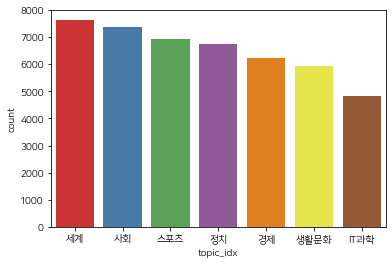

In [15]:
sns.countplot(data=df, x='topic_idx',
              order=df['topic_idx'].value_counts().index,
              palette='Set1')

### 문장 길이 분포

In [16]:
topic = list(df['title'])

length_title = []
list_topic = list(df['topic_idx'])


for t in topic:
  length_title.append(len(t))

dict_lenght = {'title_length':length_title,
               'topic':list_topic}

df_length = pd.DataFrame(dict_lenght)

df_length.head()

,title_length,topic
0,24,세계
1,30,세계
2,30,세계
3,32,세계
4,25,세계


In [17]:
min_length = df_length['title_length'].min()
max_length = df_length['title_length'].max()

print(f'가장 짧은 문장 길이 : {min_length}')
print(f'가장 긴 문장 길이 : {max_length}')

가장 짧은 문장 길이 : 4
가장 긴 문장 길이 : 44


In [18]:
top_10_many_length = list(df_length['title_length'].value_counts())[:10]
top_10_many_length

[4284, 4281, 4192, 4035, 4007, 3427, 3421, 2698, 2268, 2158]

In [19]:
little_length = list(df_length['title_length'].value_counts())[-1]
many_length = list(df_length['title_length'].value_counts())[0]

print(f'가장 적은 문장 길이 개수 : {little_length}')
print(f'가장 많은 문장 길이 개수 : {many_length}')

가장 적은 문장 길이 개수 : 1
가장 많은 문장 길이 개수 : 4284


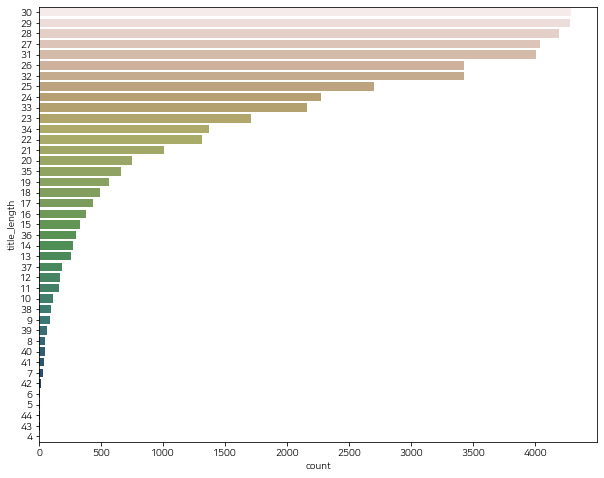

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_length, y='title_length',
              order=df_length['title_length'].value_counts().index,palette='gist_earth_r')

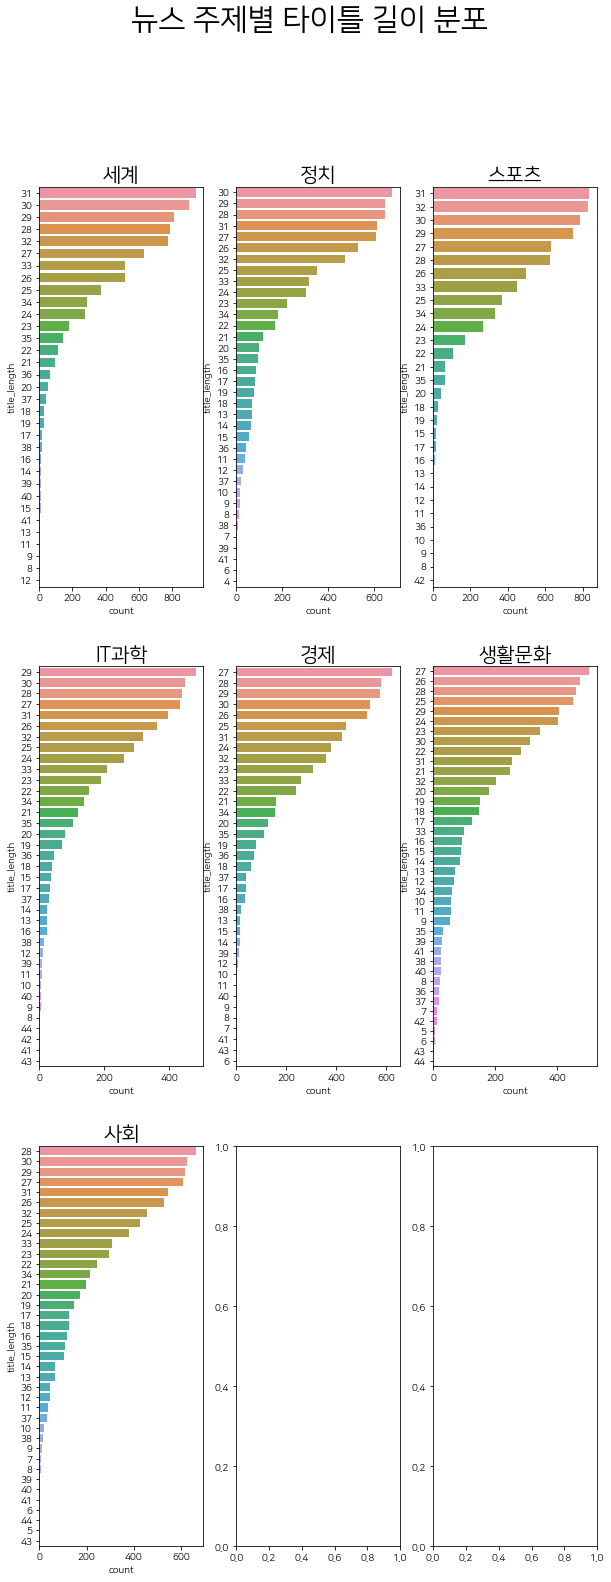

In [21]:
col_n = 3
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(10,25))

fig.suptitle('뉴스 주제별 타이틀 길이 분포', fontsize=30)

for i, topic in enumerate(list(df_length['topic'].unique())):
  cond = (df_length['topic']==topic)
  plot_df = df_length.loc[cond]
  ax[int(i/col_n),int(i%col_n)].set_title(topic, fontsize = 20)
  sns.countplot(data=plot_df,
              y='title_length',
              order=plot_df['title_length'].value_counts().index,
              ax=ax[int(i/col_n),int(i%col_n)])

### 워드 클라우드

In [22]:
f = open("/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/불용어.txt", 'r')
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

In [23]:
tokenizer = Okt()

def preprocessing(title, tokenizer, stop_words = stopwords):  
   
    title_text = re.sub('[^ㄱ-ㅎ가-힣ㅏ-ㅣ\\s]', '', title)
    
    word_title = tokenizer.morphs(title_text, stem=True)

    clean_title = [token for token in word_title if not token in stop_words]

    return clean_title

세계:   0%|          | 0/7629 [00:00<?, ?it/s]

정치:   0%|          | 0/6751 [00:00<?, ?it/s]

스포츠:   0%|          | 0/6933 [00:00<?, ?it/s]

IT과학:   0%|          | 0/4824 [00:00<?, ?it/s]

경제:   0%|          | 0/6222 [00:00<?, ?it/s]

생활문화:   0%|          | 0/5933 [00:00<?, ?it/s]

사회:   0%|          | 0/7362 [00:00<?, ?it/s]

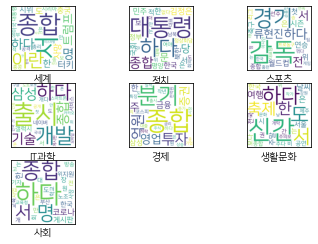

In [24]:
i = 1
fig = plt.figure()

for j, t in enumerate(list(df['topic_idx'].unique())):

  cond = (df['topic_idx']==t)
  plot_df = df.loc[cond]

  clean_title = []

  for title in tqdm(plot_df['title'], desc=t):
    clean = preprocessing(title, tokenizer, stop_words = stopwords)
    clean_title.extend(clean)

  count_word = Counter(clean_title)

  wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
               background_color='white',
               width=500, height=500, max_words=30, max_font_size=200)
  
  wc.generate_from_frequencies(dict(count_word))
  wc.to_file("{}_word.png".format(t))

  img = cv2.imread('{}_word.png'.format(t),
                 cv2.IMREAD_UNCHANGED)

  ax = fig.add_subplot(row_n, col_n, i)
  ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax.set_xlabel(t)
  ax.set_xticks([]), ax.set_yticks([])
  i += 1

plt.show()